In [10]:
import json
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import utils.minimum_union as mu
importlib.reload(mu)

<module 'utils.minimum_union' from '/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py'>

# DBpedia

In [59]:
parts = [2013, 2014, 2015, 2016]
usewod_dfs = [mu.import_statistics(f"../../new-queryshapes-results/usewod_{part}", to_set=True) for part in parts]
usewod_alt_dfs = [(df[:10000], meta) for df, meta in usewod_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
alt_error = [df[10000:]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
print(max_cov)
print(alt_error)

[0.6275395599471748, 0.9274821446890399, 0.8761425536809428, 0.7054165741974265]
[0.0003860796983636394, 0.0, 6.402106621597119e-05, 0.0016254130432050318]


In [143]:
usewod_dfs_minimum_unions = [mu.calc_minimum_unions(df, meta["VALID_QUERIES"]) for df, meta in usewod_alt_dfs]

62.75395599471748
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64]
92.748214468904
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94]
87.61425536809429
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88]
70.54165741974265
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72]


In [144]:
import pickle
with open("../../usewod_dfs_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(usewod_dfs_minimum_unions, file)

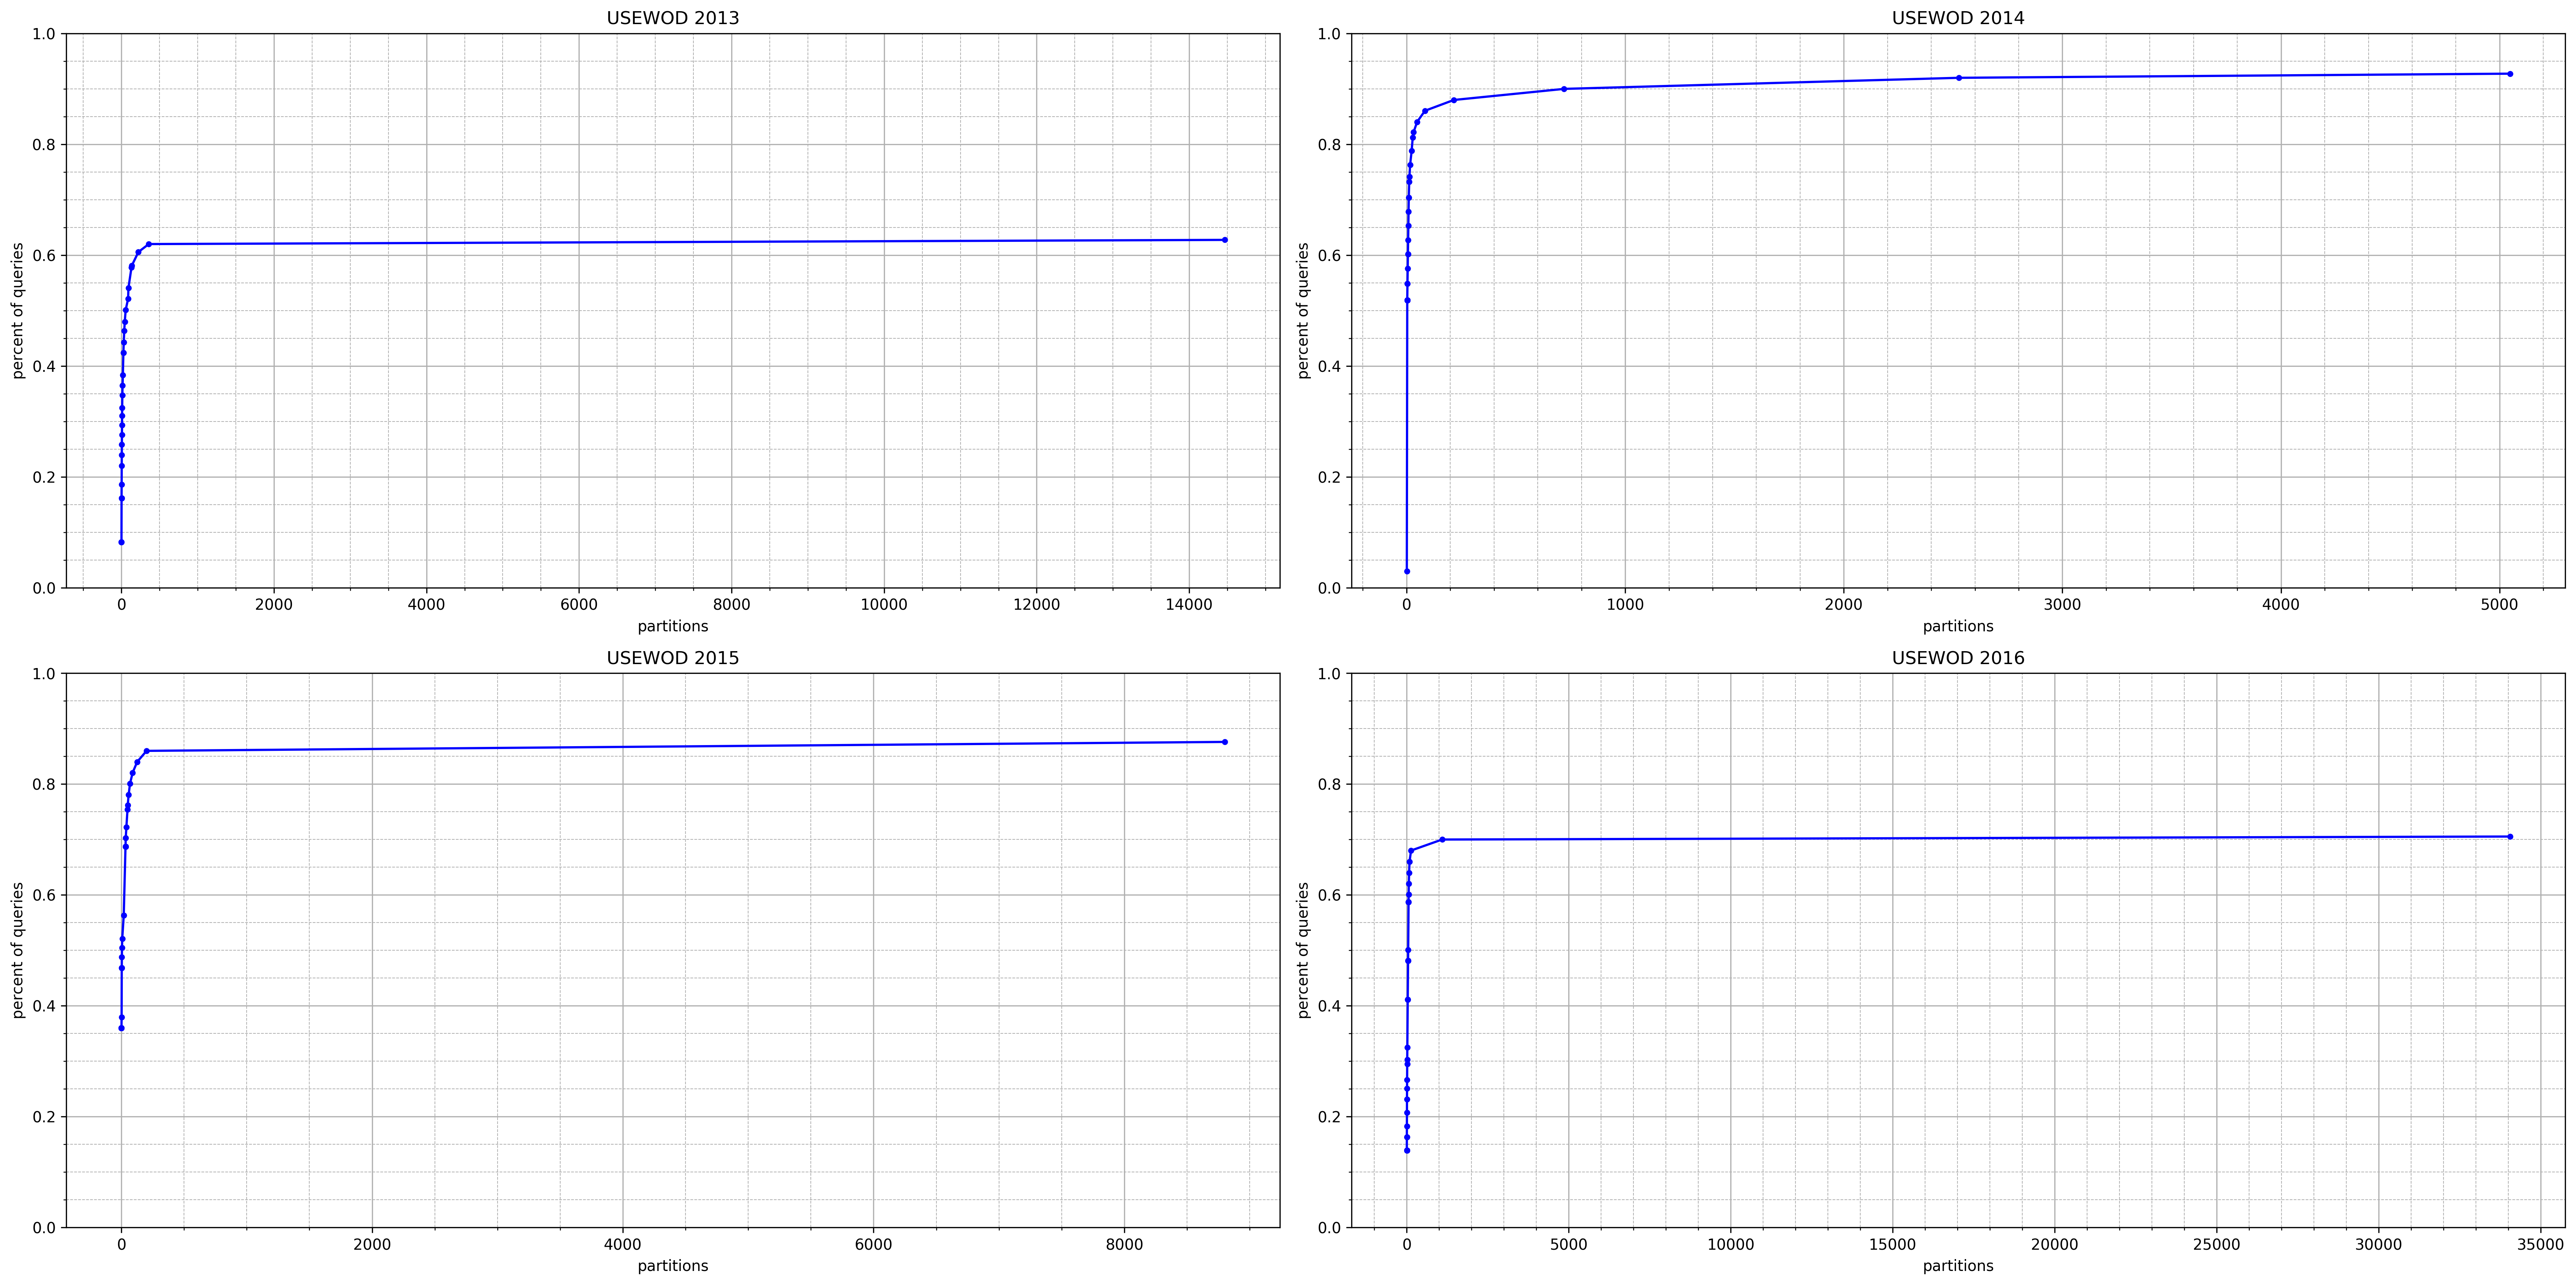

In [158]:
fig, axes = plt.subplots(2,2,figsize=(24,12),dpi=300)
axli = axes.flatten()

for (year, min_unions, axes) in zip(parts, usewod_dfs_minimum_unions, axli):
    mu.plot_minimum_unions(min_unions, axes, f"USEWOD {year}")
    
fig.tight_layout()

In [9]:
parts = [2013, 2014, 2015, 2016]
usewod_df, usewod_meta = mu.import_combined([f"../../new-queryshapes-results/usewod_{part}" for part in parts])
usewod_alt_df = usewod_df[:10000]

max_cov = usewod_df["weight"].sum() / usewod_meta["VALID_QUERIES"]
usewod_alt_error = usewod_df[10000:]["weight"].sum() / usewod_meta["VALID_QUERIES"]

print(max_cov)
print(usewod_alt_error)

0.7276752840705705
0.0021173378054110707


In [86]:
usewod_df

set   weight
0                                                    {5}  9348230
1      {5,18,20, 5,8,19,20, 5,14,19,21, 5,19,20,22, 5...  7773272
2      {11,12, 2,8, 8,10, 14, 8,16, 8,13, 8, 15, 8,9,...  3430791
3                                                    {8}  1754769
4                                                    {2}  1493810
5      {5,58,59,909,1083,1729, 5,58,59,909,1083,1726,...  1416281
6                                               {8, 2,8}  1103911
7                                                   {31}   911312
8                                                   {45}   605372
9                                           {52, 5,8, 8}   590023
10                                                 {129}   556859
11                                          {8, 8,11,12}   543059
12                                        {3,5, 3,4,326}   513980
13                                                 {5,8}   479673
14                                            {1154, 24}   445724
15                                            {5,31, 45}   387134
16                                                   {1}   297622
17                                                  {44}   295232
18                                                  {16}   268206
19                                                {8,52}   267552
20                                                  {52}   258346
21                                  {2,8,16, 8,38, 8,52}   229358
22                                               {11,12}   225665
23                                                {8,38}   217398
24                                                {8,10}   202988
25                                               {52, 5}   195486
26                          {5,98, 5,502, 2,5, 5, 5,100}   191422
27     {9, 5,8,24,42, 1,5,8, 5,8,24, 3,5,8,41, 1,5,8,...   173485
28                                              {71,129}   150138
29                                                {1076}   149765
...                                                  ...      ...
62502                                       {5, 5,31416}        1
62503                                       {5,31415, 5}        1
62504                                       {5,31436, 5}        1
62505                                       {5, 5,31438}        1
62506                                       {5, 5,31462}        1
62507                                       {5, 5,31439}        1
62508                                       {5,31461, 5}        1
62509                                       {5,31460, 5}        1
62510                                        {5,3146, 5}        1
62511                                            {23777}        1
62512                                       {5, 5,31458}        1
62513                                       {5,31457, 5}        1
62514                                       {5, 5,31456}        1
62515                                       {5, 5,31455}        1
62516                                       {5,31454, 5}        1
62517                                       {5, 5,31453}        1
62518                                       {5,31452, 5}        1
62519                                       {5,31451, 5}        1
62520                                            {23778}        1
62521                                            {23779}        1
62522                                       {5, 5,31448}        1
62523                                       {5, 5,31447}        1
62524                                       {5, 5,31446}        1
62525                                       {5,31445, 5}        1
62526                                       {5, 5,31444}        1
62527                                            {23780}        1
62528                                       {5, 5,31442}        1
62529                                            {23781}        1
62530                                       {5, 5,31440}        1
62531                      

In [10]:
usewod_meta["VALID_QUERIES"]

58190998

In [8]:
usewod_minimum_unions = mu.calc_minimum_unions(usewod_alt_df, usewod_meta["VALID_QUERIES"])

72.55579462651595
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]


Process ForkPoolWorker-1:
Process ForkPoolWorker-8:
Process ForkPoolWorker-5:
Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multip

KeyboardInterrupt: 

  File "/usr/local/lib/python3.7/site-packages/pandas/core/frame.py", line 6487, in apply
    return op.get_result()
Traceback (most recent call last):
  File "/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py", line 56, in calc_minimum_union
    df["cumulative_weight"] = df.apply(lambda row: calc_cumulative_weight(row, df), axis=1)
  File "/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py", line 56, in calc_minimum_union
    df["cumulative_weight"] = df.apply(lambda row: calc_cumulative_weight(row, df), axis=1)
  File "/usr/local/lib/python3.7/site-packages/pandas/core/apply.py", line 151, in get_result
    return self.apply_standard()
  File "/usr/local/lib/python3.7/site-packages/pandas/core/frame.py", line 6487, in apply
    return op.get_result()
  File "/usr/local/lib/python3.7/site-packages/pandas/core/frame.py", line 6487, in apply
    return op.get_result()
  File "/usr/local/lib/python3.7/site-packages/pandas/cor

  File "/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py", line 94, in <lambda>
    covered_rows = df["remaining"].map(lambda remaining: len(remaining - row["remaining"]) == 0)
  File "/usr/local/lib/python3.7/site-packages/pandas/core/apply.py", line 251, in apply_standard
    labels=labels)
  File "/usr/local/lib/python3.7/site-packages/pandas/core/apply.py", line 251, in apply_standard
    labels=labels)
  File "/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py", line 94, in <lambda>
    covered_rows = df["remaining"].map(lambda remaining: len(remaining - row["remaining"]) == 0)
  File "pandas/_libs/lib.pyx", line 2217, in pandas._libs.lib.map_infer
  File "/usr/local/lib/python3.7/site-packages/pandas/core/frame.py", line 6487, in apply
    return op.get_result()
  File "pandas/_libs/reduction.pyx", line 641, in pandas._libs.reduction.reduce
  File "/usr/local/lib/python3.7/site-packages/pandas/core/series.py", line 8

  File "/Users/jan/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py", line 94, in calc_cumulative_weight
    covered_rows = df["remaining"].map(lambda remaining: len(remaining - row["remaining"]) == 0)
  File "/usr/local/lib/python3.7/site-packages/pandas/core/internals/blocks.py", line 308, in dtype
    @property
KeyboardInterrupt
  File "pandas/_libs/reduction.pyx", line 641, in pandas._libs.reduction.reduce
  File "/usr/local/lib/python3.7/site-packages/pandas/core/series.py", line 3382, in map
    arg, na_action=na_action)
  File "pandas/_libs/reduction.pyx", line 146, in pandas._libs.reduction.Reducer.get_result
  File "/usr/local/lib/python3.7/site-packages/pandas/core/base.py", line 1218, in _map_values
    new_values = map_f(values, mapper)
  File "pandas/_libs/lib.pyx", line 2217, in pandas._libs.lib.map_infer
  File "pandas/_libs/lib.pyx", line 84, in pandas._libs.lib.values_from_object
KeyboardInterrupt
KeyboardInterrupt
  File "/Users/jan/Git/wu-bachel

In [71]:
import pickle
with open("../../usewod_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(usewod_minimum_unions, file)

In [7]:
max_cov

NameError: name 'max_cov' is not defined

In [8]:
import pickle
import itertools
usewod_minimum_unions = pickle.load(open("../../usewod_minimum_unions_new.pickle", "rb"))

In [5]:
import json
with open("../../usewod_minimum_unions.json", "r") as file:
    usewod_min_unions_json = json.load(file)

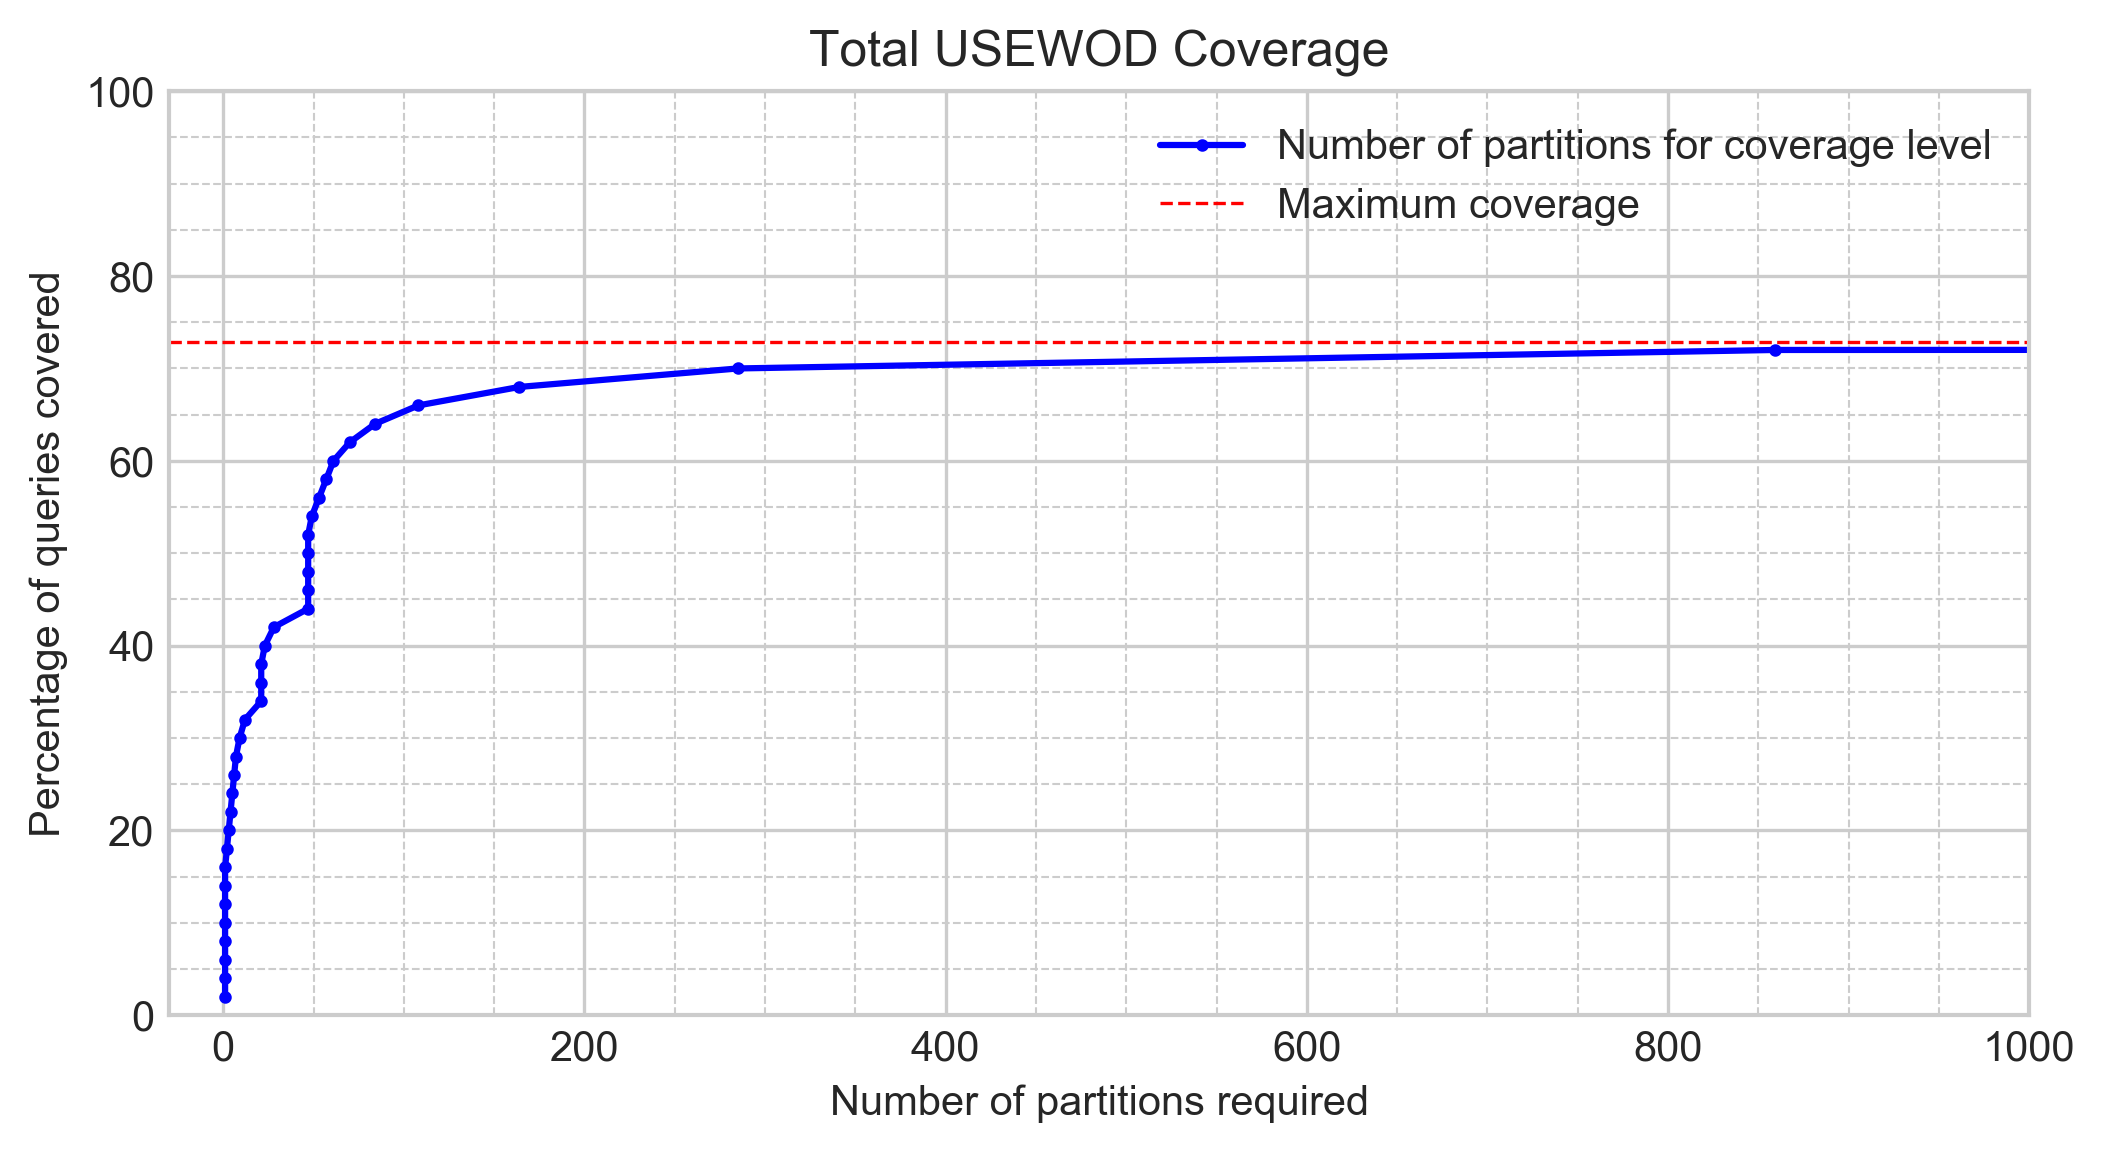

In [83]:
fig, axes = plt.subplots(1, 1, figsize=(8,4), dpi=300)
mu.plot_minimum_unions(usewod_min_unions_json, axes, f"Total USEWOD Coverage", (-30,1000), positions=([i for i in range(2, 74, 2)] + [72.558749]), max_cov=max_cov*100)

In [19]:
import pickle
import itertools
#usewod_minimum_unions = pickle.load(open("../../usewod_minimum_unions_new.pickle", "rb"))
#usewod_minimum_unions = [list(k for k,_ in itertools.groupby(k)) for k in usewod_minimum_unions]
usewod_minimum_unions_70 = usewod_minimum_unions[-3]

In [21]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../../new-queryshapes-results/usewod_predicate_map.tsv").readlines())}
for partition in usewod_minimum_unions_70[0]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [24]:
file = open("../../new-queryshapes-results/usewod_partitions_70.txt", "w")
file.write("Total coverage: " + str(usewod_minimum_unions_70[1]) + "\n")
for part in resolved_partitions:
    file.write(part + "\n")

In [25]:
sorted_partitions = sorted(resolved_partitions, key=lambda p: len(p.split(",")))
file = open("../../new-queryshapes-results/usewod_partitions_70_by_partition_size.txt", "w")
file.write("Total coverage: " + str(usewod_minimum_unions_70[1]) + "\n")
for part in sorted_partitions:
    file.write(part + "\n")

In [29]:
sizes = {}
for part in resolved_partitions:
    split = part.split(",")
    sizes[len(split)] = sizes.get(len(split), 0) + 1
sizes

{1: 128, 2: 54, 3: 30, 4: 50, 5: 11, 6: 6}

In [28]:
len(sorted_partitions)

279

# Wikidata

## All

In [31]:
import pandas as pd
import json

parts = [1,2,3,4,5,6,7]

all_df, all_meta = mu.import_combined([f"../../new-queryshapes-results/wikidata_all_{part}" for part in parts])
alt_df = all_df[:10000]

max_cov = all_df["weight"].sum() / all_meta["VALID_QUERIES"]
alt_error = all_df[10000:]["weight"].sum() / all_meta["VALID_QUERIES"]

print(max_cov)
print(alt_error)

0.7287950354307022
0.001870723636839543


In [30]:
418450525 / all_meta["VALID_QUERIES"]

0.7269453531394727

In [95]:
all_minimum_unions = mu.calc_minimum_unions(alt_df, all_meta["VALID_QUERIES"])

72.69243117938628
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]


In [34]:
import json
with open("../../wikidata_all_minimum_unions.json", "r") as file:
    all_min_unions_json = json.load(file)

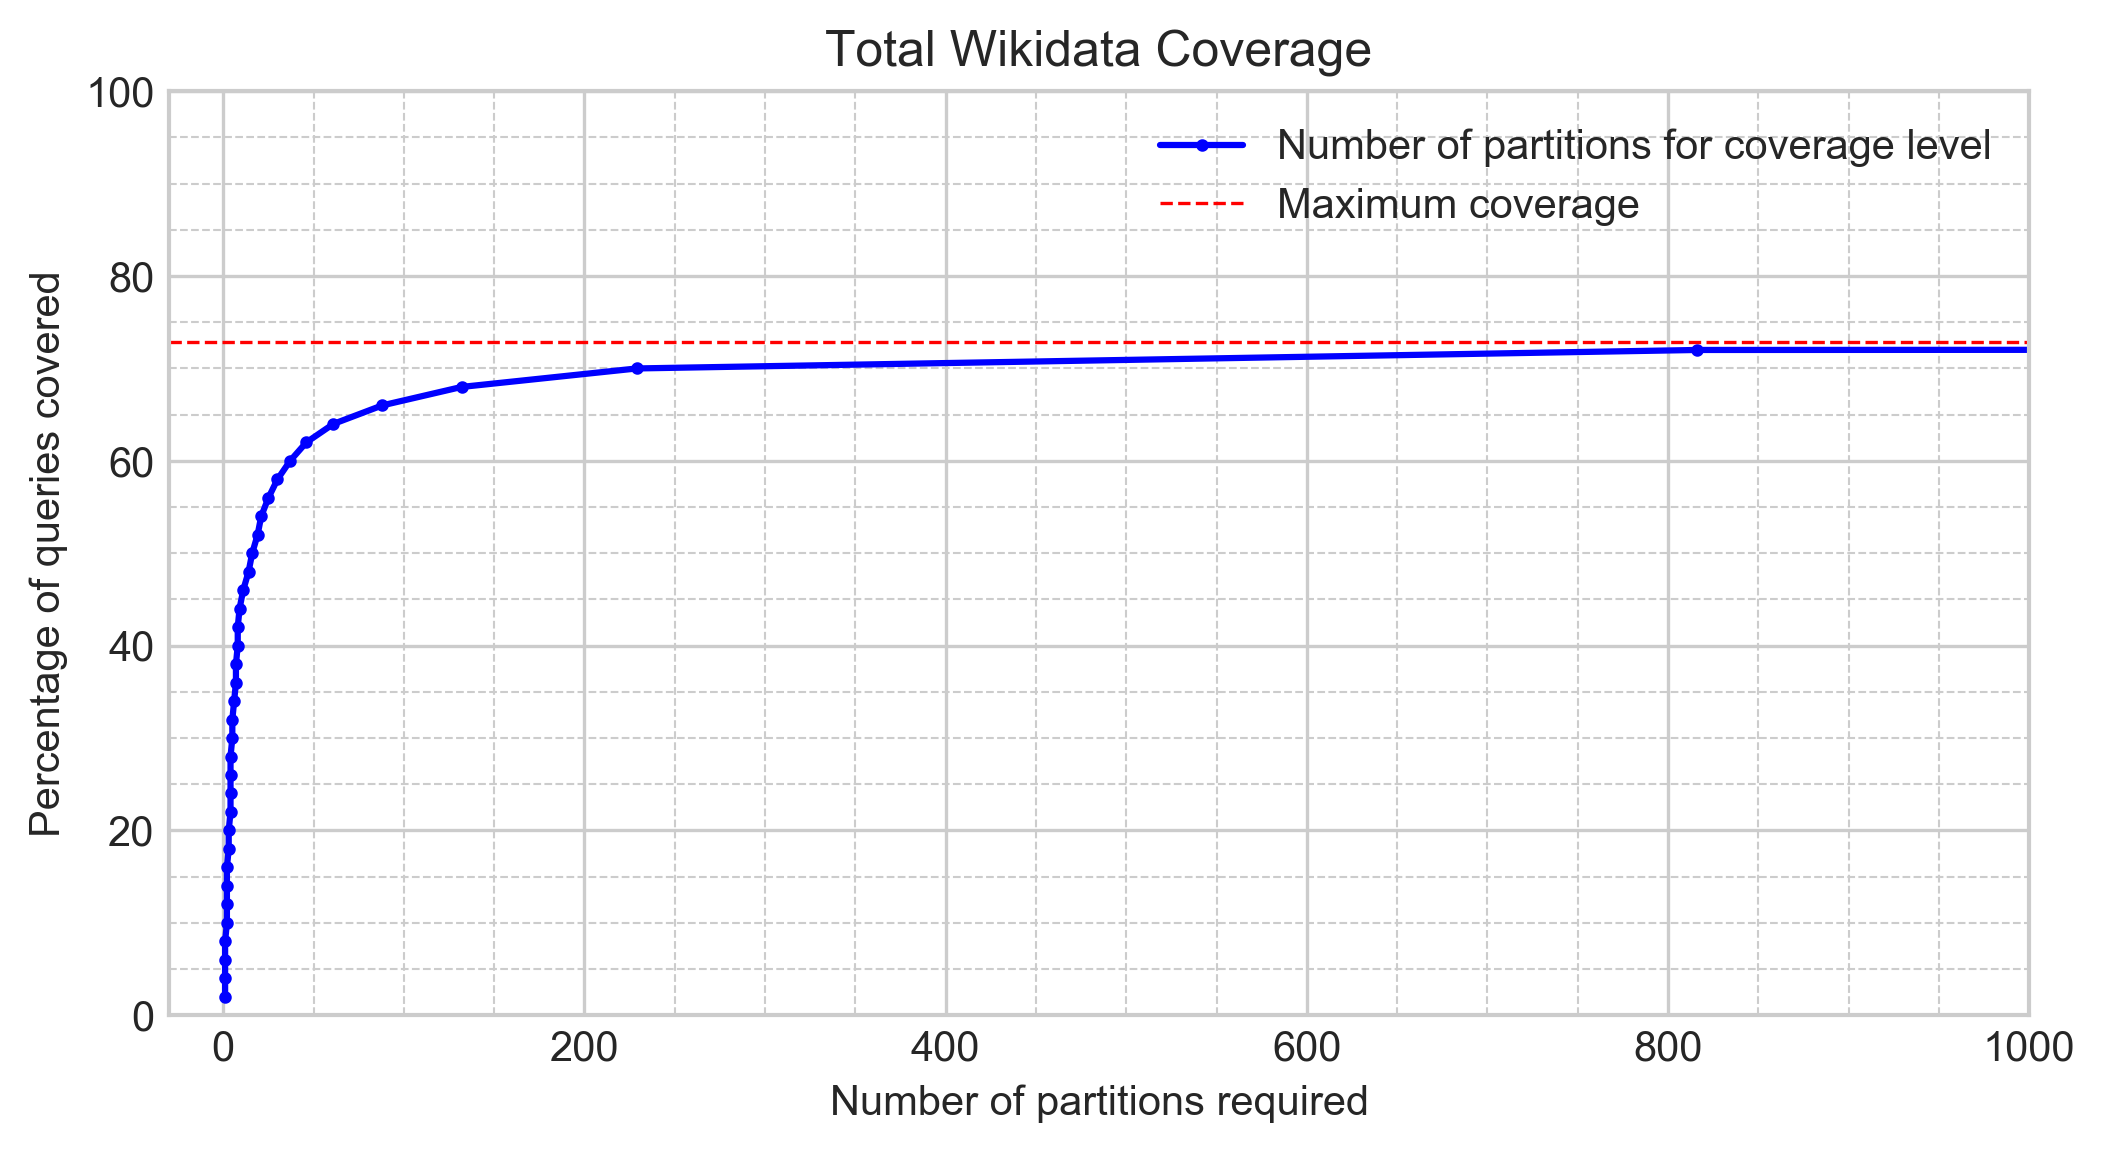

In [85]:
plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
mu.plot_minimum_unions(all_min_unions_json, axes, 'Total Wikidata Coverage', (-30, 1000), positions=([i for i in range(2, 74, 2)] + [72.69453531394727]), max_cov=max_cov*100)

In [33]:
import pickle
with open("../../all_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(all_minimum_unions, file)

In [24]:
all_minimum_unions = pickle.load(open("../../all_minimum_unions_new.pickle", "rb"))
all_minimum_unions = [list(k for k,_ in itertools.groupby(k)) for k in all_minimum_unions]
all_minimum_unions_70 = all_minimum_unions[-3]
all_minimum_unions_70

/home/jhadl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


[['42',
  '211',
  '379',
  '66',
  '10',
  '342',
  '146',
  '514',
  '123',
  '173',
  '18',
  '5',
  '2687',
  '5966',
  '537,650,2630',
  '649',
  '3,12,23',
  '231',
  '23644',
  '3',
  '13',
  '236',
  '6',
  '7',
  '2690',
  '5806',
  '61,62',
  '3,13',
  '21',
  '24,26,29',
  '2686',
  '6254',
  '1',
  '61',
  '3,12,13,14',
  '23',
  '168',
  '22635',
  '1308',
  '255,1309',
  '255,259,1309',
  '3,145',
  '6,23',
  '6,168',
  '3,6',
  '143',
  '62,143',
  '120',
  '49',
  '3330',
  '12',
  '47',
  '2887',
  '61,4079',
  '13643',
  '6062',
  '13251',
  '5835',
  '18,65',
  '194',
  '24,28,29',
  '27',
  '3,56',
  '142',
  '13401',
  '5870',
  '14,64',
  '14,64,517',
  '6,14,64',
  '121',
  '35',
  '3,6,87',
  '14,64,168',
  '3,18,168',
  '3,6,18',
  '125',
  '14',
  '3,21',
  '59',
  '483',
  '3,265',
  '3,56,57',
  '3,56,58',
  '3,56,59',
  '3,6,66',
  '3,6,66,228',
  '3,6,66,448',
  '87',
  '2599',
  '736',
  '3,18,416,492',
  '493',
  '119',
  '28',
  '21,49',
  '24,26',
  '4

In [25]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../../new-queryshapes-results/wikidata_predicate_map.tsv").readlines())}
for partition in all_minimum_unions_70[0]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [27]:
file = open("../../new-queryshapes-results/wikidata_all_partitions_70.txt", "w")
file.write("Total coverage: " + str(all_minimum_unions_70[1]) + "\n")

for part in resolved_partitions:
    file.write(part + "\n")

## Organic Queries

In [8]:
parts = [1,2,3,4,5,6,7]
organic_df, organic_meta = mu.import_combined([f"../../new-queryshapes-results/wikidata_organic_{part}" for part in parts])
organic_alt_df = organic_df[:40000]
max_cov = organic_df["weight"].sum() / organic_meta["VALID_QUERIES"]
alt_error = organic_df[25000:]["weight"].sum() / organic_meta["VALID_QUERIES"]

print(max_cov)
print(alt_error)

0.6651256827578499
0.023207708074883038


In [6]:
print(2256097 / organic_meta["VALID_QUERIES"])
print(organic_df[:25000]["weight"].sum() / organic_meta["VALID_QUERIES"])

0.6432606094233058
0.6419179746829669


In [30]:
organic_minimum_unions = mu.calc_minimum_unions(organic_alt_df, organic_meta["VALID_QUERIES"])

65.3889634797078
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66]


In [7]:
import json
with open("../../wikidata_organic_minimum_unions.json", "r") as file:
    organic_min_unions_json = json.load(file)

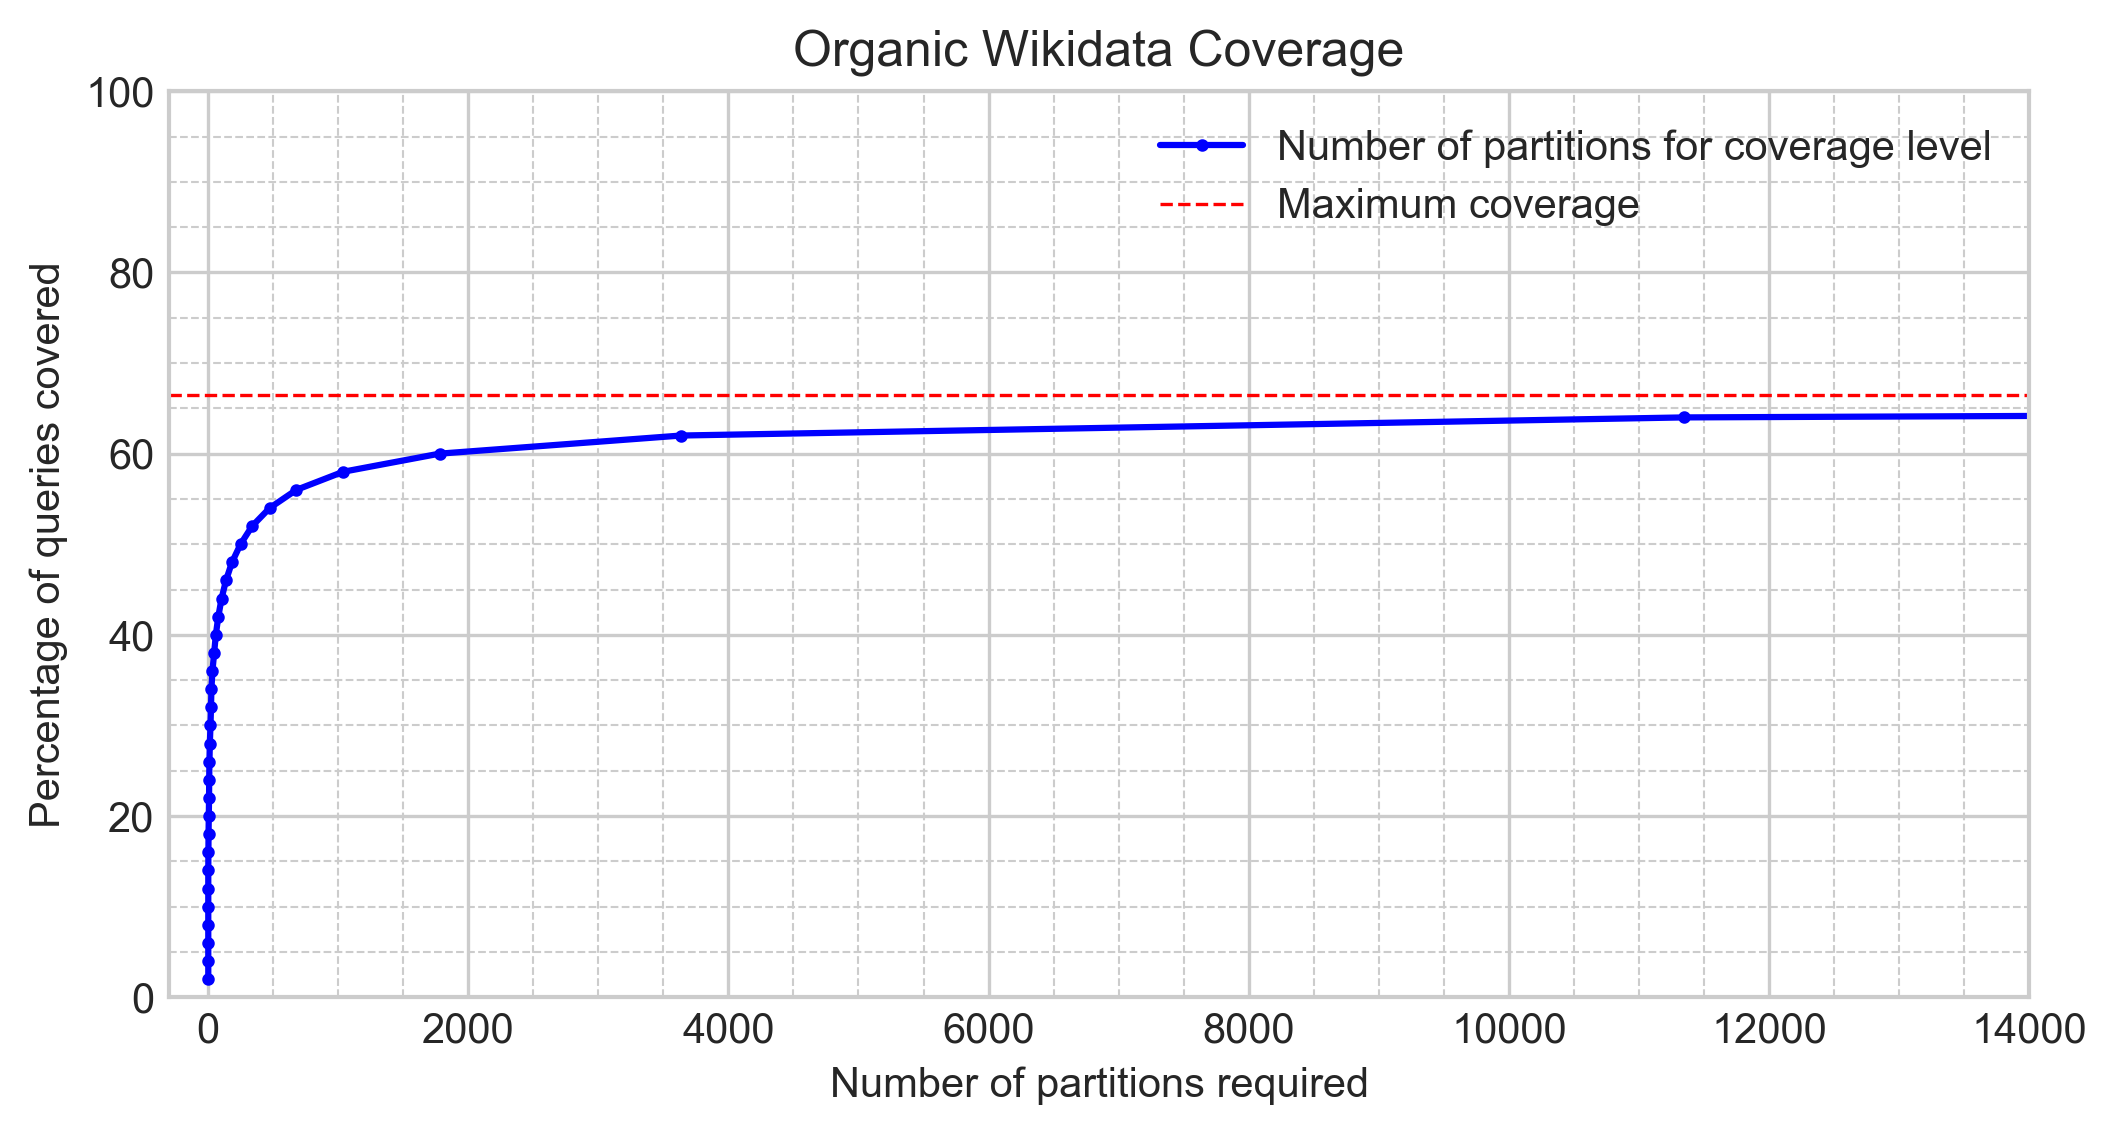

In [13]:
plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4),dpi=300)
mu.plot_minimum_unions(organic_min_unions_json, axes, 'Organic Wikidata Coverage', (-300, 14000), positions=([i for i in range(2, 66, 2)] + [64.32606094233058]), max_cov=max_cov*100)

In [32]:
import pickle
with open("../../organic_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(organic_minimum_unions, file)

In [33]:
organic_minimum_unions = pickle.load(open("../../organic_minimum_unions_new.pickle", "rb"))
organic_minimum_unions = [list(k for k,_ in itertools.groupby(k)) for k in organic_minimum_unions]
organic_minimum_unions_60 = organic_minimum_unions[-4]
organic_minimum_unions_60

/home/jhadl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


[['3,6',
  '96,97,98,99,100,540,541',
  '733',
  '1,450',
  '1',
  '553',
  '24,29',
  '49',
  '7',
  '3',
  '21,569',
  '569',
  '231',
  '23644',
  '142',
  '126',
  '6,23',
  '929',
  '315',
  '18',
  '19',
  '21',
  '22',
  '891',
  '19,20',
  '13',
  '53',
  '96,97,99,100',
  '42',
  '18,65,1481',
  '6',
  '151',
  '3,14',
  '3,64',
  '24',
  '13,14,21,47',
  '13,14,47',
  '13,14',
  '13,14,21',
  '24,26,29',
  '3,79',
  '79',
  '79,142',
  '14',
  '1311',
  '23',
  '655',
  '21,2205',
  '2131',
  '22,2205',
  '2205',
  '3,2205',
  '66',
  '66,2205',
  '14942',
  '21,14942',
  '3,14942',
  '66,14942',
  '2131,2132',
  '3,450',
  '1622',
  '2982',
  '13,450',
  '1328',
  '89,1121,1680',
  '56,370',
  '6,56,370',
  '56',
  '57,288',
  '3,65',
  '64',
  '102',
  '56,135',
  '6,922',
  '864',
  '113,228',
  '18,66',
  '107',
  '173',
  '3339',
  '402',
  '65',
  '8',
  '205',
  '3,21',
  '143',
  '78',
  '13,47,338',
  '18821',
  '1550',
  '23,1550',
  '28',
  '3,66',
  '3,461',
  '3,

In [34]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../../new-queryshapes-results/wikidata_predicate_map.tsv").readlines())}
for partition in organic_minimum_unions_60[0]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [35]:
file = open("../../new-queryshapes-results/wikidata_organic_partitions_60.txt", "w")
file.write("Total coverage: " + str(organic_minimum_unions_60[1]) + "\n")

for part in resolved_partitions:
    file.write(part + "\n")

## Development over time - All

In [2]:
parts = [1,2,3,4,5,6,7]
all_dfs = [mu.import_statistics(f"../../new-queryshapes-results/wikidata_all_{part}", to_set=True) for part in parts]
all_alt_dfs = [(df[:10000], meta) for df, meta in all_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in all_dfs]
alt_error = [df[10000:]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in all_dfs]
print(max_cov)
print(alt_error)

[0.8318499515079743, 0.8867341725988775, 0.862508527234499, 0.67297751951376, 0.6373632802726334, 0.7005387666505976, 0.6037357079555528]
[0.0037111629817312523, 0.0007124311821698181, 0.0004825254421077645, 0.000914314935167695, 0.0013605881146155734, 0.0012338392233956375, 0.0016690661710733877]


In [27]:
all_dfs

[(                          set   weight
  0                        {42}  8436063
  1                       {211}  8317382
  2                   {379, 66}  6396719
  3                       {342}  3246487
  4                      {6, 7}  2585156
  ...                       ...      ...
  117930             {28, 9089}        1
  117931              {246, 28}        1
  117932             {28, 7747}        1
  117933  {28,12116, 28, 12116}        1
  117934  {13973, 28, 28,13973}        1
  
  [117935 rows x 2 columns],
  {'SUB_QUERY': 232365,
   'FILTER': 13396314,
   'NAMED_GRAPH': 3,
   'ZERO_OR_ONE': 48341,
   'VALID_QUERIES': 59536593,
   'ALT': 2080455,
   'NO_GRAPH_PATTERN': 146659,
   'INVERSE': 60390,
   'MINUS': 312331,
   'OPTIONAL': 14469030,
   'NEGATED_PROP_SET': 5,
   'VARIABLE_PREDICATE': 9849738,
   'UNSUPPORTED_FEATURE': 9849743,
   'TOTAL_QUERIES': 59547909,
   'PROPERTY_PATH': 12257485,
   'ONE_OR_MORE': 204133,
   'FILTER_EXISTS': 6696,
   'TOTAL_LINES': 59547909,
  

In [3]:
import json

all_dfs_min_unions = []

for i in range(1, 8):
    with open(f"../../wikidata_all_{i}_minimum_unions.json", "r") as file:
        all_dfs_min_unions.append(json.load(file))

In [14]:
len(all_dfs_min_unions)

7

42
45
44
34
32
35
31


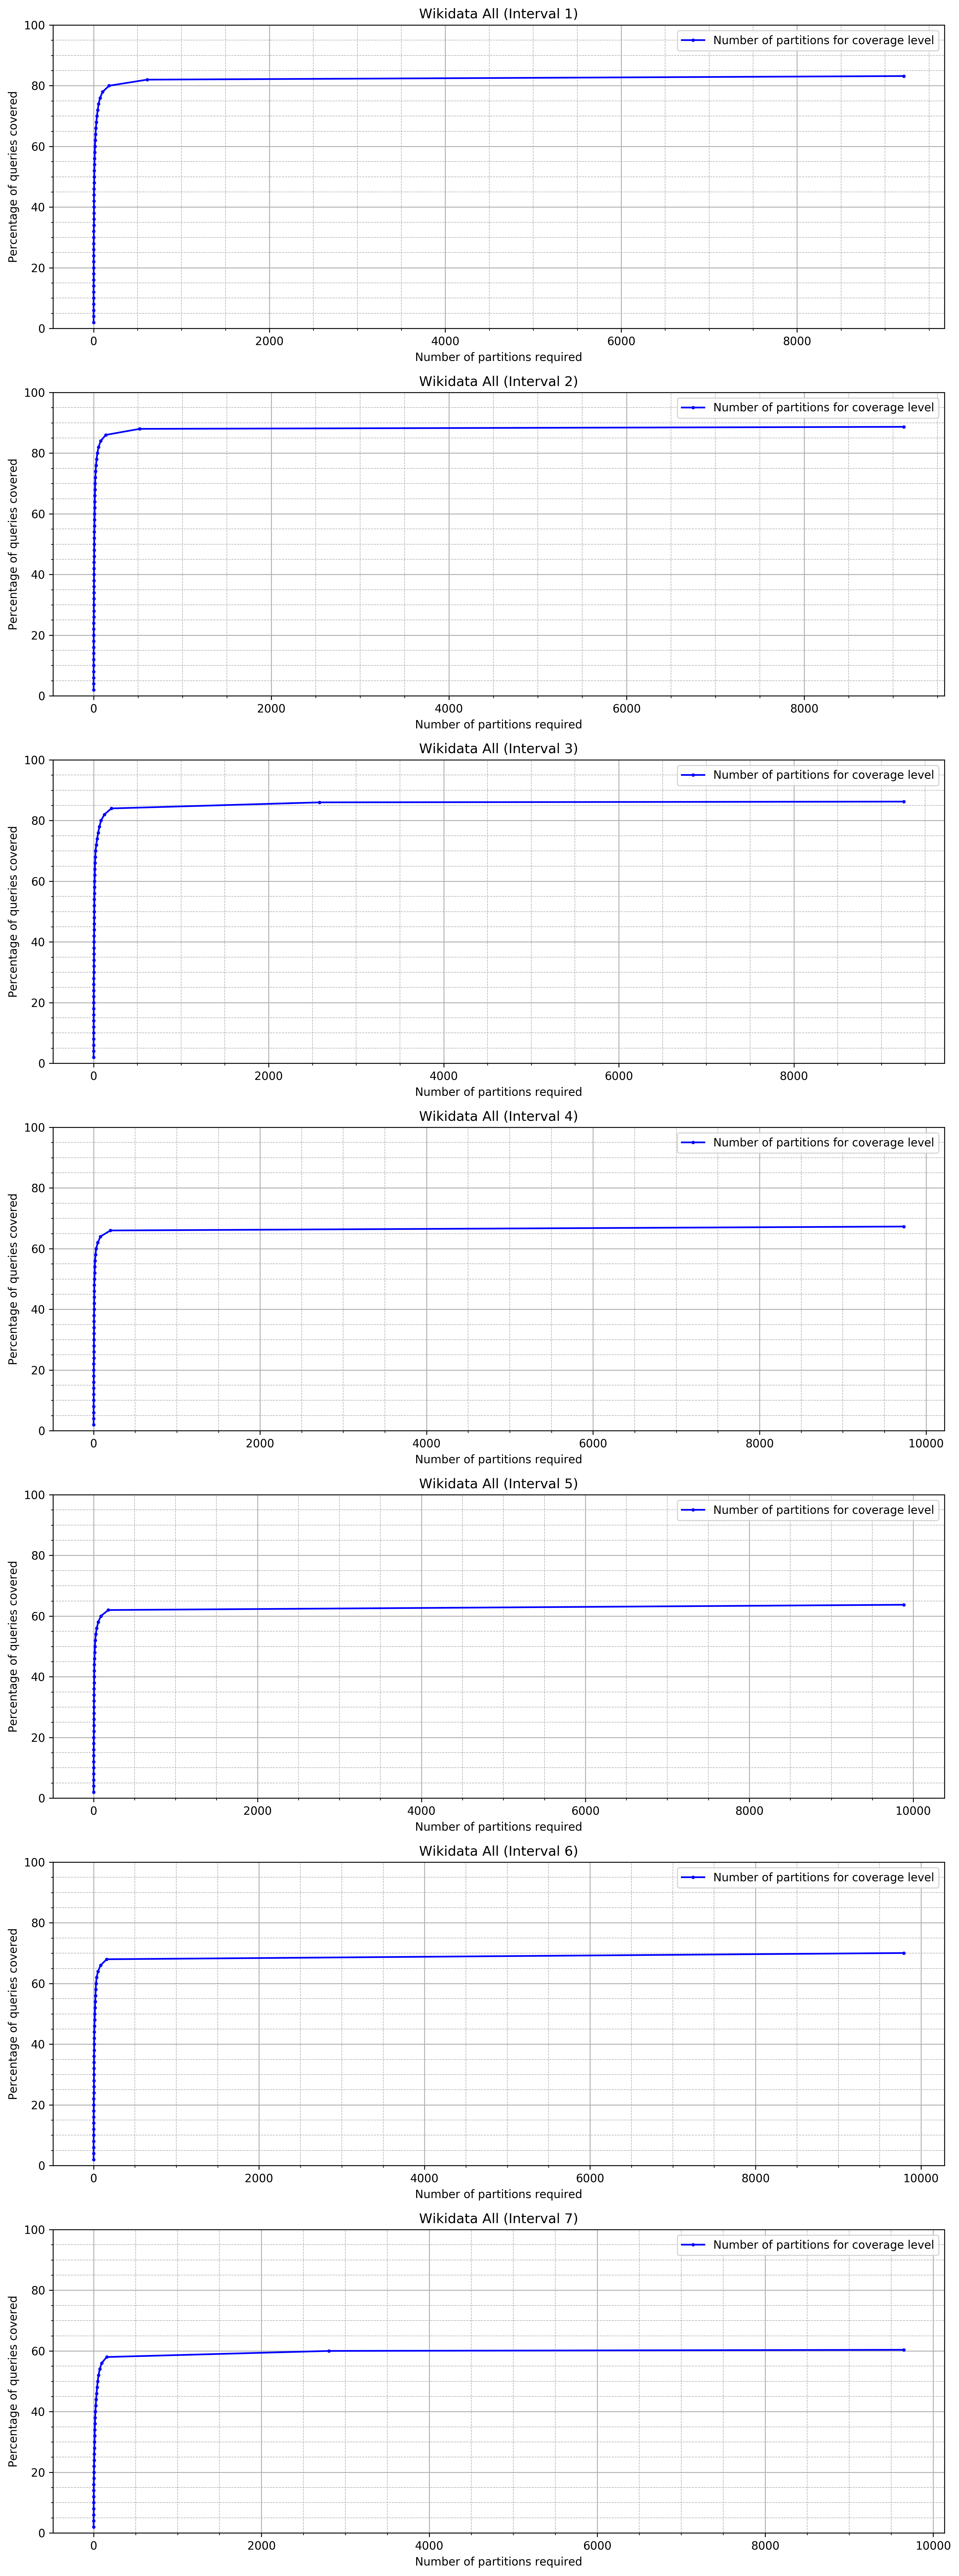

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,1, figsize=(12,32),dpi=300)

for i, min_unions in enumerate(all_dfs_min_unions):
    print(len(min_unions))
    mu.plot_minimum_unions(min_unions, axes[i], f"Wikidata All (Interval {i+1})", positions=([i for i in range(2, len(min_unions)*2, 2)] + [max_cov[i] * 100]))
    
fig.tight_layout()

In [6]:
under_threshold = []
for min_unions in all_dfs_min_unions:
    under_candidate = min_unions[0]
    for i in range(1, len(min_unions)):
        if (len(min_unions[i]["optimalPartitions"]) - len(min_unions[i-1]["optimalPartitions"])) < 200:
            candidate = min_unions[i]
            
    under_threshold.append(candidate)

#under_threshold = [[u for u in min_unions if len(u["optimalPartitions"]) < 500][-1] for min_unions in all_dfs_min_unions]
[len(u["optimalPartitions"]) for u in under_threshold]

[177, 137, 204, 203, 180, 159, 157]

[0.961726049394502, 0.9699539137062965, 0.9739749951538373, 0.980765968887626, 0.9728499755566157, 0.9707771501714703, 0.9608360883925421]
[None, 0.9002700913872811, 0.8682835520132165, 0.9367039576111132, 0.8098945930857994, 0.9155550279922917, 0.8548014406647545]


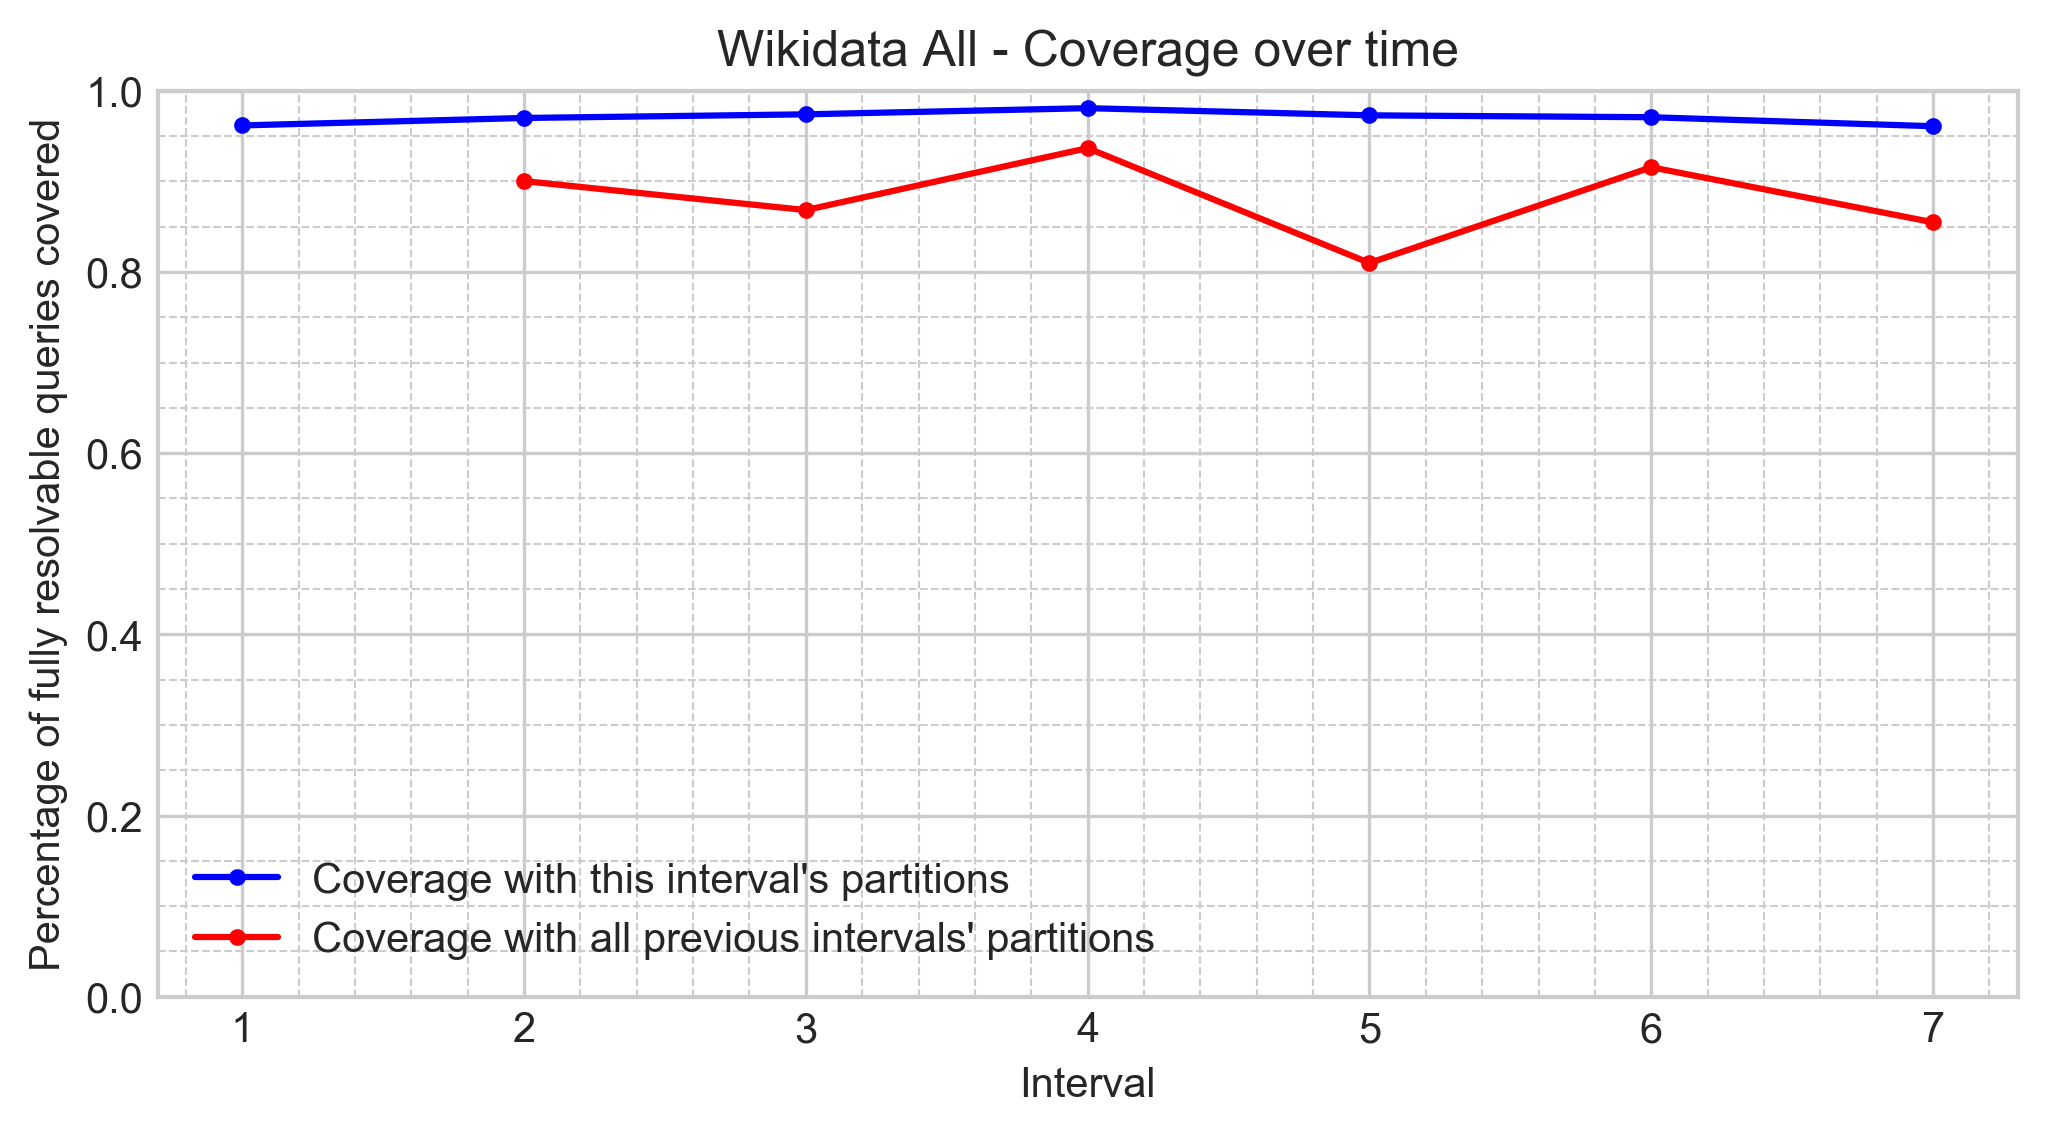

In [11]:
all_cov_now, all_cov_prev = mu.calc_coverage_progression(all_dfs, under_threshold)
print(all_cov_now)
print(all_cov_prev)

plt.style.use("seaborn-whitegrid")
fig, axes = plt.subplots(figsize=(8,4), dpi=300)
mu.plot_coverage_progression(all_cov_now, all_cov_prev, axes, "Wikidata All - Coverage over time")

## Development over time - Organic

In [25]:
parts = [1,2,3,4,5,6,7]
organic_dfs = [mu.import_statistics(f"../../new-queryshapes-results/wikidata_organic_{part}", to_set=True) for part in parts]

max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in organic_dfs]
alt_error = [df[40000:]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in organic_dfs]
print(max_cov)
print(alt_error)

organic_dfs

[0.8614116298081517, 0.8410322502080331, 0.8201103608181456, 0.47023425098233307, 0.5974780888893351, 0.6783963546174995, 0.6796618238604609]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[(                                 set  weight
  0          {7, 18, 19, 22, 6,23, 21}   11025
  1                             {7, 3}    5529
  2       {19,20, 7, 18, 22, 6,23, 21}    4503
  3                            {24,29}    3839
  4                              {231}    2852
  ...                              ...     ...
  14733                      {6, 1764}       1
  14734              {3,56,136, 3,136}       1
  14735                 {220, 7, 3,35}       1
  14736             {231, 3,6,197,637}       1
  14737  {2771,2772, 2771, 28,2770, 7}       1
  
  [14738 rows x 2 columns],
  {'SUB_QUERY': 25097,
   'FILTER': 58034,
   'NAMED_GRAPH': 1,
   'ZERO_OR_ONE': 3022,
   'VALID_QUERIES': 188378,
   'ALT': 5330,
   'NO_GRAPH_PATTERN': 98,
   'INVERSE': 1003,
   'MINUS': 3767,
   'OPTIONAL': 79029,
   'NEGATED_PROP_SET': 5,
   'VARIABLE_PREDICATE': 25826,
   'UNSUPPORTED_FEATURE': 25831,
   'PROPERTY_PATH': 35530,
   'TOTAL_QUERIES': 192330,
   'ONE_OR_MORE': 2547,
   'FILTER_EXIST

In [64]:
organic_dfs_minimum_unions = [mu.calc_minimum_unions(df, meta["VALID_QUERIES"]) for df, meta in organic_dfs]

86.14116298081517
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88]
84.10322502080331
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86]
82.01103608181455
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]
47.023425098233304
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
59.747808888933506
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
67.83963546174995
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68]
67.96618238604609
[2, 4, 6, 8, 10, 12, 1

In [65]:
import pickle
with open("../../organic_dfs_minimum_unions.pickle", "wb") as file:
    pickle.dump(organic_dfs_minimum_unions, file)

In [8]:
import pickle
import itertools
organic_dfs_minimum_unions = pickle.load(open("../../organic_dfs_minimum_unions.pickle", "rb"))
organic_dfs_dedup = [list(k for k,_ in itertools.groupby(k)) for k in organic_dfs_minimum_unions]

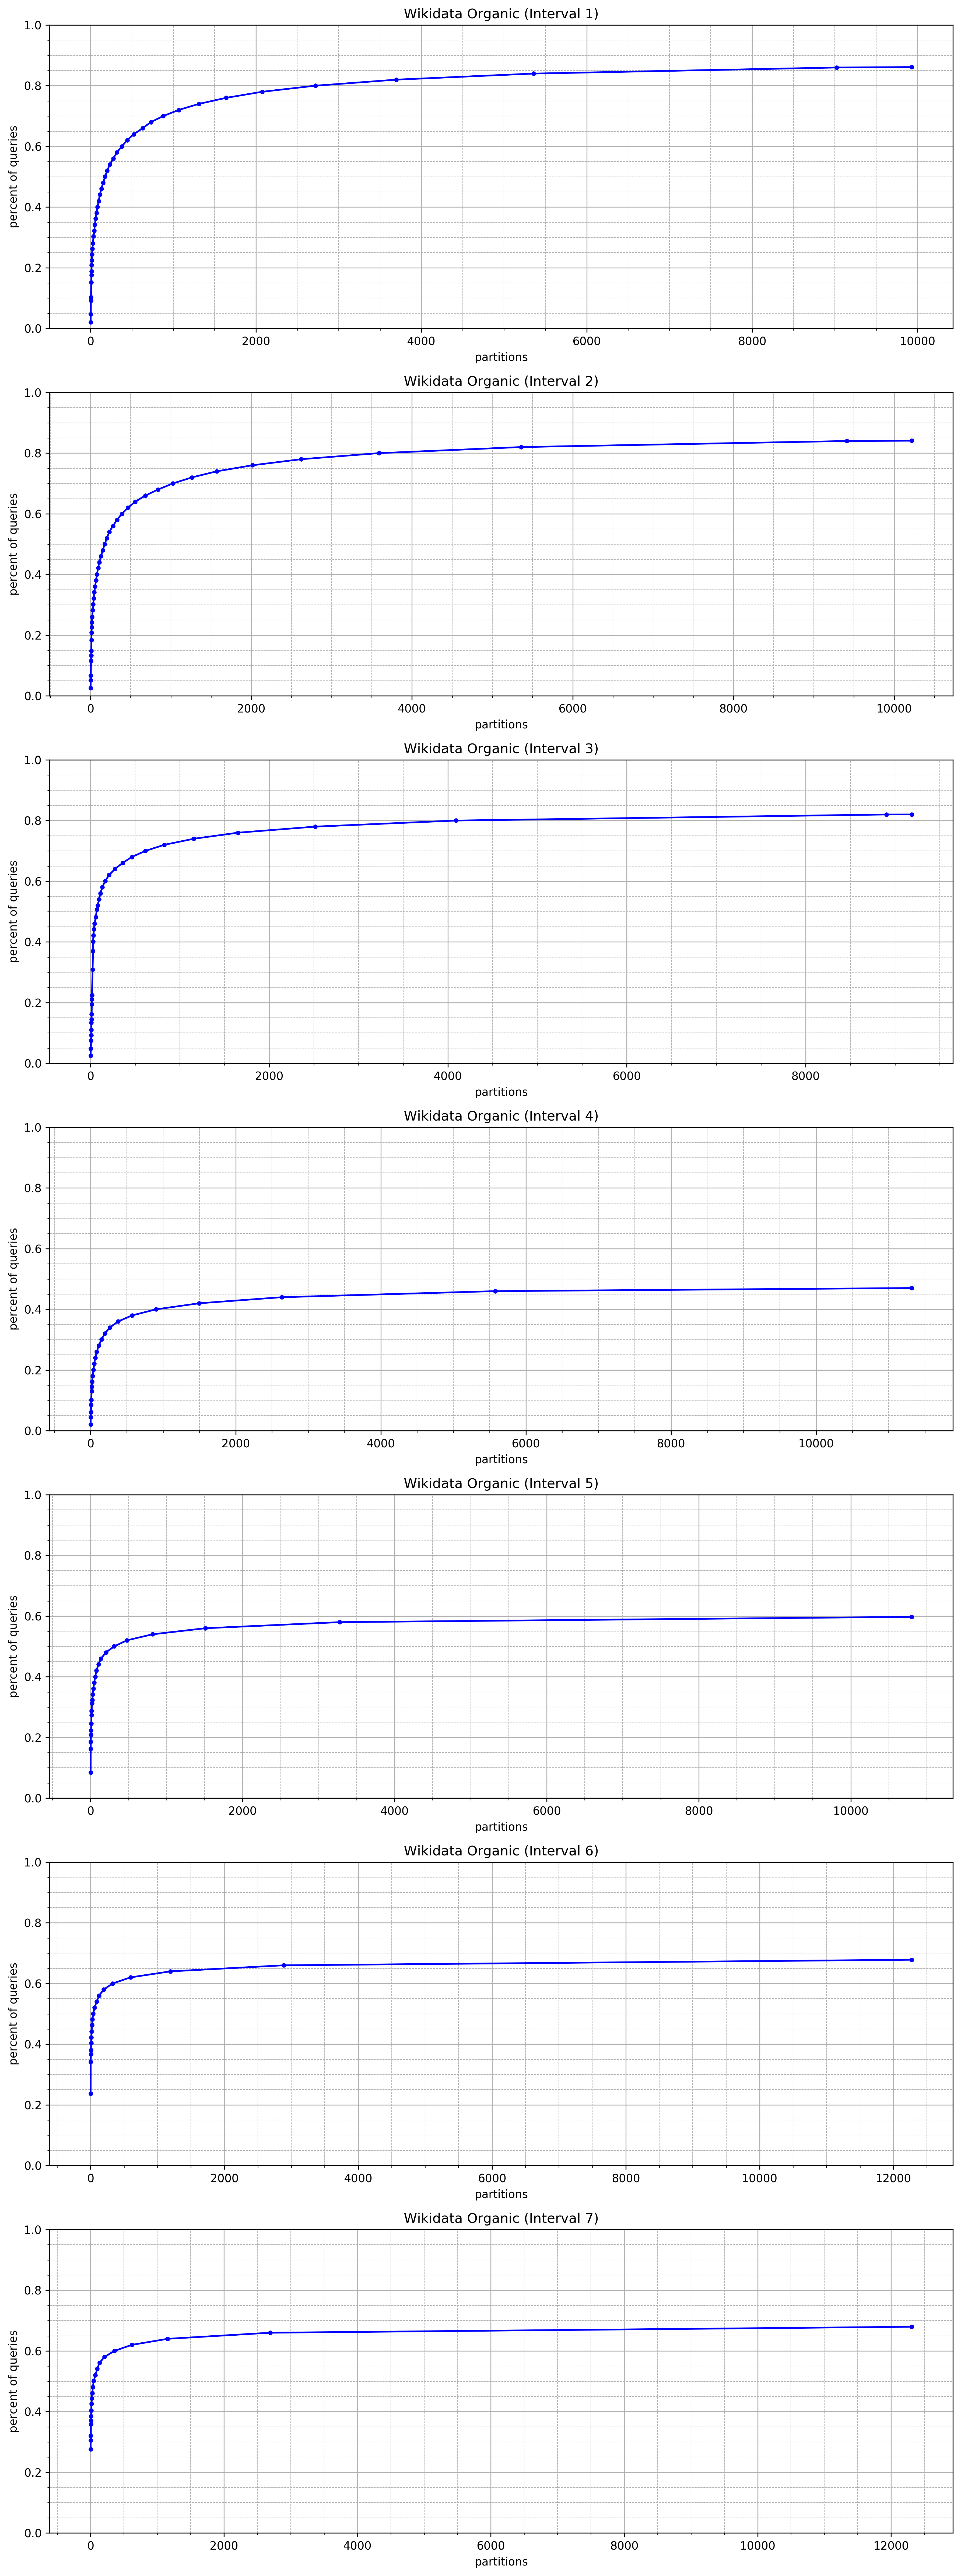

In [172]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,1, figsize=(12,32),dpi=300)

for i, min_unions in enumerate(organic_dfs_dedup):
    mu.plot_minimum_unions(min_unions, axes[i], f"Wikidata Organic (Interval {i+1})")
    
fig.tight_layout()

[0.8200002123390204, 0.8000040591828865, 0.780012345957828, 0.44000072430089876, 0.5800044173602257, 0.6600034982755295, 0.6600034958360453]
[None, 0.6451665279779181, 0.6287630705300481, 0.36693485919389335, 0.5220349306106331, 0.6289495754977193, 0.6245920566325439]


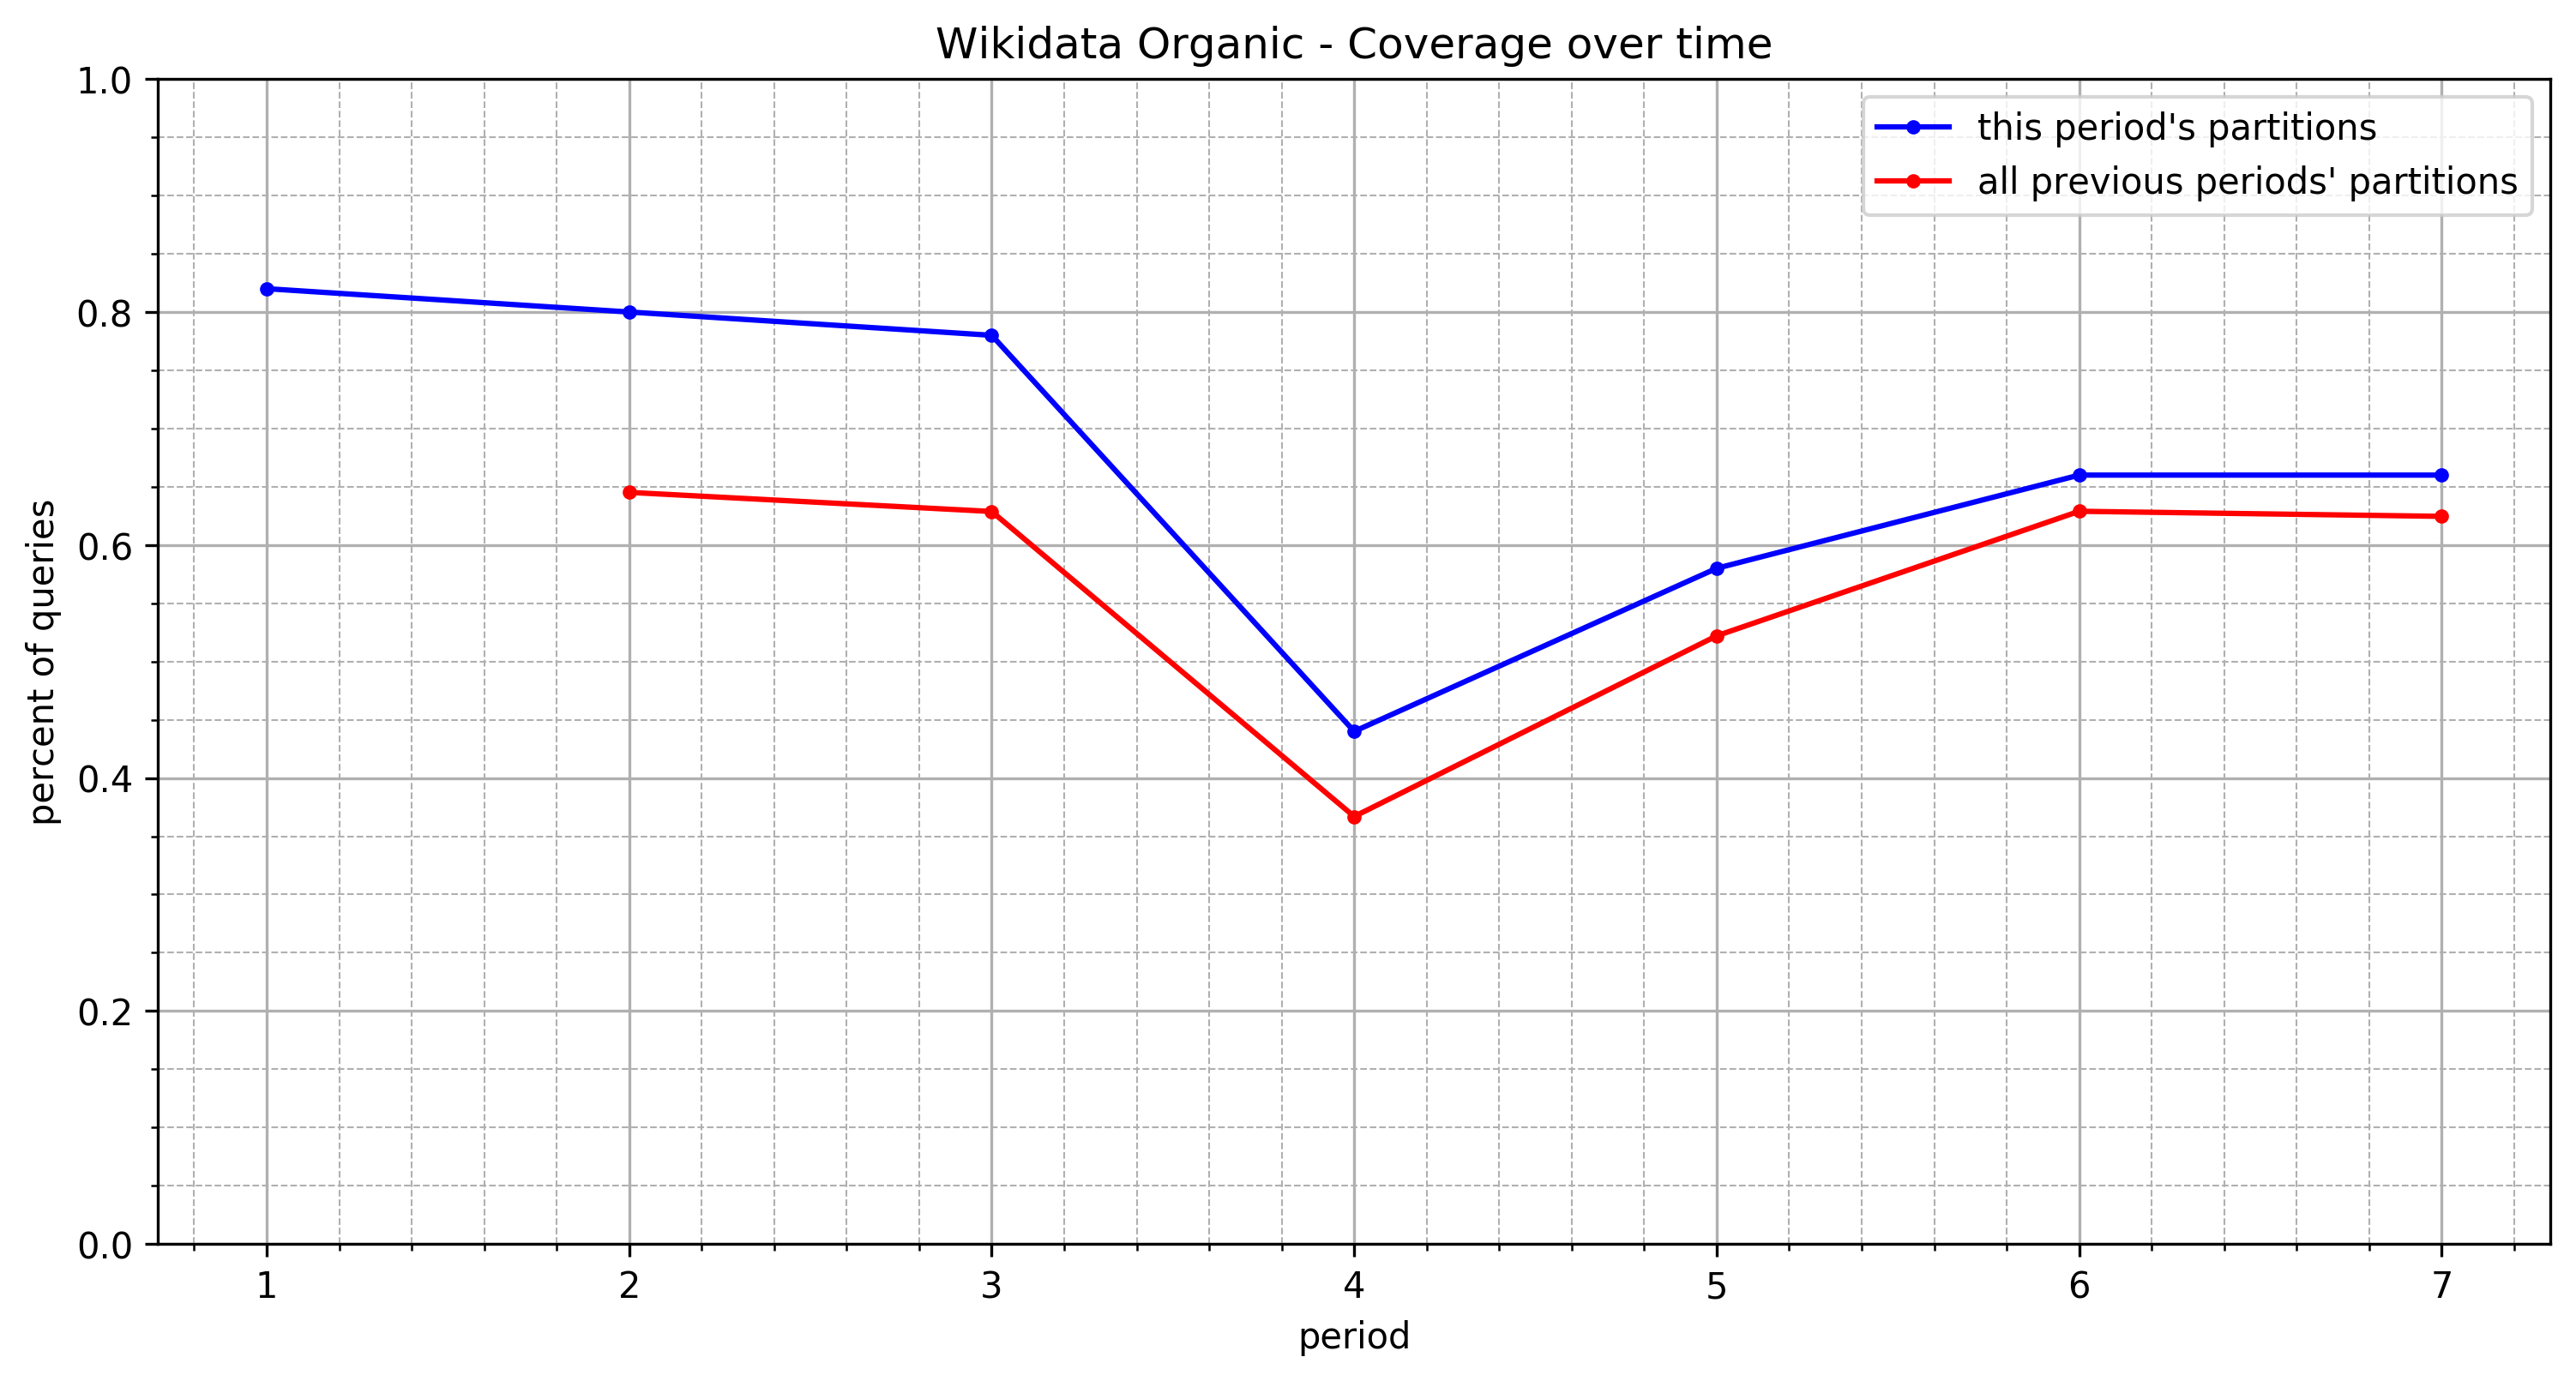

In [11]:
subset = [-3, -3, -3, -2, -1, -1, -1]

organic_optimal_partitions = [min_unions[subset[i] -1] for i, min_unions in enumerate(organic_dfs_dedup)]
organic_cov_now, organic_cov_prev = mu.calc_coverage_progression(organic_dfs, organic_optimal_partitions)
print(organic_cov_now)
print(organic_cov_prev)

fig, axes = plt.subplots(figsize=(12,6), dpi=300)
mu.plot_coverage_progression(organic_cov_now, organic_cov_prev, axes, "Wikidata Organic - Coverage over time")  